In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import line_interpolate_point

In [ ]:
sitename = "nzd0357"
water = pd.read_csv(
    f"../CoastSat/data/{sitename}/transect_time_series_tidally_corrected.csv"
)
water.index = pd.to_datetime(water.dates)
display(water)
veg = pd.read_csv(f"Data/{sitename}/transect_time_series.csv")
veg.index = pd.to_datetime(veg.dates + "+00:00").dt.floor("s")
display(veg)

,dates,nzd0357-0000,nzd0357-0001,nzd0357-0002,nzd0357-0003,nzd0357-0004,nzd0357-0005,nzd0357-0006,nzd0357-0007,nzd0357-0008,...,nzd0357-0116,nzd0357-0117,nzd0357-0118,nzd0357-0119,nzd0357-0120,nzd0357-0121,nzd0357-0122,nzd0357-0123,nzd0357-0124,satname
dates,,,,,,,,,,,,,,,,,,,,,
1999-07-02 21:59:57+00:00,1999-07-02 21:59:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L7
1999-09-04 22:00:09+00:00,1999-09-04 22:00:09+00:00,238.166667,280.98,290.839091,292.019091,295.729091,298.190000,300.540000,308.900,320.804118,...,356.466207,360.460000,360.804545,364.128421,354.178571,355.798571,356.270000,372.28,367.66,L7
1999-10-22 22:00:04+00:00,1999-10-22 22:00:04+00:00,229.195556,273.62,291.074545,290.584545,289.464545,290.866667,296.266667,303.655,316.100588,...,355.698621,362.743333,369.747273,366.842632,356.263810,355.973810,364.923333,370.25,370.99,L7
1999-12-09 22:00:09+00:00,1999-12-09 22:00:09+00:00,NaN,288.60,297.368182,299.848182,300.678182,305.223333,308.293333,312.150,318.044706,...,357.696897,362.846667,367.409091,365.458421,354.727619,356.317619,358.796667,371.89,368.49,L7
2000-02-11 21:59:57+00:00,2000-02-11 21:59:57+00:00,NaN,288.38,307.965455,305.015455,306.445455,305.216667,308.686667,314.720,326.233529,...,356.970000,362.863333,368.502727,NaN,NaN,NaN,NaN,NaN,NaN,L7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25 22:07:06+00:00,2025-07-25 22:07:06+00:00,NaN,NaN,NaN,398.128182,398.998182,402.720000,396.140000,398.770,397.128235,...,361.712414,360.140000,375.769091,380.156842,373.787143,372.067143,376.380000,386.81,377.23,L9
2025-08-02 22:07:09+00:00,2025-08-02 22:07:09+00:00,NaN,NaN,NaN,NaN,405.459091,411.373333,408.633333,405.325,406.278235,...,356.914828,359.926667,380.314545,380.646316,374.006190,369.256190,377.776667,383.59,382.92,L8
2025-08-10 22:07:16+00:00,2025-08-10 22:07:16+00:00,NaN,NaN,NaN,400.995455,403.585455,405.360000,401.290000,398.295,394.742941,...,354.066897,352.470000,371.672727,377.655789,367.725714,368.335714,369.660000,382.26,372.04,L9


,dates,satname,nzd0357-0000,nzd0357-0001,nzd0357-0002,nzd0357-0003,nzd0357-0004,nzd0357-0005,nzd0357-0006,nzd0357-0007,...,nzd0357-0082,nzd0357-0083,nzd0357-0084,nzd0357-0085,nzd0357-0086,nzd0357-0087,nzd0357-0088,nzd0357-0089,nzd0357-0102,nzd0357-0103
dates,,,,,,,,,,,,,,,,,,,,,
1999-10-22 22:00:04+00:00,1999-10-22 22:00:04.598000,L7,261.97,361.51,224.42,440.53,448.64,412.73,398.90,219.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-09 22:00:09+00:00,1999-12-09 22:00:09.551000,L7,331.45,362.43,194.37,NaN,439.49,400.22,358.16,421.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-27 21:59:52+00:00,2000-02-27 21:59:52.393000,L7,333.47,367.25,210.19,NaN,441.99,399.82,346.39,429.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-30 21:59:45+00:00,2000-03-30 21:59:45.397000,L7,321.61,354.55,202.16,NaN,438.74,400.48,347.75,394.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01 21:59:30+00:00,2000-05-01 21:59:30.586000,L7,308.80,363.27,229.94,NaN,437.42,382.30,319.25,314.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 22:07:17+00:00,2025-02-07 22:07:17.137000,L8,488.86,383.87,508.04,402.81,325.13,226.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-23 22:07:07+00:00,2025-02-23 22:07:07.365000,L8,NaN,533.07,468.10,379.25,298.97,194.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-19 22:07:06+00:00,2025-03-19 22:07:06.727000,L9,NaN,416.33,464.64,381.66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
transects = gpd.read_file("../CoastSat/transects_extended.geojson")
transects = transects[transects.site_id == sitename].to_crs(2193)
transects.set_index("id", inplace=True)
transects

,site_id,orientation,along_dist,along_dist_norm,beach_slope,cil,ciu,trend,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry
id,,,,,,,,,,,,,,,,,
nzd0357-0000,nzd0357,73.094842,0.000000,0.000000,0.045,0.0370,0.0564,5.623028,431.0,359.0,0.824168,14.832567,367.766949,19.177251,265.410881,None,"LINESTRING (1688398.43 5405041.714, 1689260.51..."
nzd0357-0001,nzd0357,73.094842,100.000000,0.008072,0.050,0.0400,0.0607,5.098258,431.0,363.0,0.851751,12.534242,252.073159,15.876812,277.721479,None,"LINESTRING (1688419.355 5404969.981, 1689281.4..."
nzd0357-0002,nzd0357,73.094842,200.000000,0.016144,0.055,0.0475,0.0722,4.600081,431.0,360.0,0.853486,11.601104,201.553315,14.196947,286.183742,None,"LINESTRING (1688440.279 5404898.247, 1689302.3..."
nzd0357-0003,nzd0357,74.410072,300.000000,0.024216,0.055,0.0417,0.0813,4.334610,431.0,363.0,0.844311,11.334423,192.844903,13.886861,289.519078,None,"LINESTRING (1688458.996 5404834.226, 1689326.7..."
nzd0357-0004,nzd0357,75.728431,399.999750,0.032288,0.055,0.0442,0.0692,4.134957,431.0,362.0,0.842164,11.123148,179.805870,13.409171,292.792787,None,"LINESTRING (1688474.559 5404769.392, 1689347.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nzd0357-0120,nzd0357,37.825475,11988.878017,0.967736,0.105,0.0943,0.1244,0.263965,431.0,376.0,0.091859,4.711650,37.839001,6.151341,362.348179,None,"LINESTRING (1694886.458 5398886.719, 1695441.2..."
nzd0357-0121,nzd0357,43.484867,12088.878017,0.975808,0.105,0.0939,0.1248,0.247979,431.0,376.0,0.084737,4.602281,36.591100,6.049058,363.309775,None,"LINESTRING (1694913.602 5398856.794, 1695535.5..."
nzd0357-0122,nzd0357,41.821970,12188.858222,0.983878,0.120,0.1029,0.1395,0.262941,431.0,372.0,0.077576,4.951853,45.197167,6.722884,367.438248,None,"LINESTRING (1694975.148 5398798.284, 1695577.9..."


In [37]:
transect_ids = water.columns[water.columns.str.startswith("nzd")].to_series()
transect_ids

nzd0357-0000    nzd0357-0000
nzd0357-0001    nzd0357-0001
nzd0357-0002    nzd0357-0002
nzd0357-0003    nzd0357-0003
nzd0357-0004    nzd0357-0004
                    ...     
nzd0357-0120    nzd0357-0120
nzd0357-0121    nzd0357-0121
nzd0357-0122    nzd0357-0122
nzd0357-0123    nzd0357-0123
nzd0357-0124    nzd0357-0124
Length: 125, dtype: object

In [42]:
water["nzd0357-0000"]

dates
1999-07-02 21:59:57+00:00           NaN
1999-09-04 22:00:09+00:00    238.166667
1999-10-22 22:00:04+00:00    229.195556
1999-12-09 22:00:09+00:00           NaN
2000-02-11 21:59:57+00:00           NaN
                                ...    
2025-07-25 22:07:06+00:00           NaN
2025-08-02 22:07:09+00:00           NaN
2025-08-10 22:07:16+00:00           NaN
2025-08-26 22:07:21+00:00    422.264444
2025-09-19 22:07:27+00:00    401.852222
Name: nzd0357-0000, Length: 431, dtype: float64

In [47]:
transect_ids.apply(
    lambda transect_id: line_interpolate_point(
        transects.geometry[transect_id], water[transect_id]
    )
).T

,nzd0357-0000,nzd0357-0001,nzd0357-0002,nzd0357-0003,nzd0357-0004,nzd0357-0005,nzd0357-0006,nzd0357-0007,nzd0357-0008,nzd0357-0009,...,nzd0357-0115,nzd0357-0116,nzd0357-0117,nzd0357-0118,nzd0357-0119,nzd0357-0120,nzd0357-0121,nzd0357-0122,nzd0357-0123,nzd0357-0124
dates,,,,,,,,,,,,,,,,,,,,,
1999-07-02 21:59:57+00:00,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1999-09-04 22:00:09+00:00,POINT (1688626.611025842 5405109.95648108),POINT (1688688.5540040412 5405050.489787341),POINT (1688718.9240522915 5404981.58129221),POINT (1688740.6163598802 5404911.4611656545),POINT (1688761.4797015085 5404841.032918337),POINT (1688781.455340171 5404769.017638025),POINT (1688801.2810720291 5404697.14793376),POINT (1688826.3990440893 5404626.637046518),POINT (1688854.698086204 5404556.660639521),POINT (1688885.7186783014 5404484.986223595),...,POINT (1694826.5006453611 5399407.347485107),POINT (1694870.8749019175 5399347.120360268),POINT (1694924.5184436224 5399296.194534219),POINT (1694983.2336839149 5399252.108317715),POINT (1695046.9701162658 5399213.926068111),POINT (1695105.056763913 5399165.388981476),POINT (1695159.7419323653 5399113.713444927),POINT (1695214.0448965824 5399062.588075913),POINT (1695277.7012195496 5399027.5991266435),POINT (1695341.2218885992 5398994.562319288)
1999-10-22 22:00:04+00:00,POINT (1688618.0160651363 5405107.385978203),POINT (1688681.5025998885 5405048.380925213),POINT (1688719.1496345834 5404981.648756813),POINT (1688739.2328990127 5404911.081749407),POINT (1688755.401753163 5404839.51533023),POINT (1688774.3500430472 5404767.2439514985),POINT (1688797.1312180222 5404696.128085977),POINT (1688821.2983975606 5404625.414986785),POINT (1688850.121636155 5404555.57468654),POINT (1688883.0022345337 5404483.901530894),...,POINT (1694821.8344173266 5399403.193957971),POINT (1694870.320717286 5399346.589259543),POINT (1694926.0322326447 5399297.903935841),POINT (1694988.3593336702 5399259.436351944),POINT (1695048.429489474 5399216.214554209),POINT (1695106.3437702553 5399167.029662003),POINT (1695159.8631615445 5399113.839982969),POINT (1695219.8473953363 5399069.007669823),POINT (1695276.6182082223 5399025.882156502),POINT (1695342.553145512 5398997.614638903)
1999-12-09 22:00:09+00:00,None,POINT (1688695.85450671 5405052.673147317),POINT (1688725.179388274 5404983.45206741),POINT (1688748.1666545514 5404913.531845457),POINT (1688766.2813777227 5404842.231837166),POINT (1688788.2792714096 5404770.721087533),POINT (1688808.8103703286 5404698.998297209),POINT (1688829.559597229 5404627.394280861),POINT (1688852.0132278774 5404556.023545295),POINT (1688889.6656478785 5404486.56227282),...,POINT (1694827.154088808 5399407.929131582),POINT (1694871.763439631 5399347.971886991),POINT (1694926.1007398851 5399297.981295623),POINT (1694987.0191719164 5399257.520350721),POINT (1695047.685228947 5399215.0474573625),POINT (1695105.3956354163 5399165.820976144),POINT (1695160.1010079237 5399114.088245106),POINT (1695215.739154693 5399064.462518202),POINT (1695277.493153334 5399027.269265385),POINT (1695341.5537033852 5398995.323107661)
2000-02-11 21:59:57+00:00,None,POINT (1688695.6437310425 5405052.610110677),POINT (1688735.3323333517 5404986.488495493),POINT (1688753.1499191716 5404914.898513362),POINT (1688771.8768652142 5404843.6289607985),POINT (1688788.2728032283 5404770.719472889),POINT (1688809.1923381703 5404699.092167754),POINT (1688832.058865404 5404627.9930784805),POINT (1688859.9808068082 5404557.914184545),POINT (1688891.4487494288 5404487.274276234),...,POINT (1694824.3275724251 5399405.413178138),POINT (1694871.238632262 5399347.468939854),POINT (1694926.11178944 5399297.993773007),POINT (1694987.6460049606 5399258.416520811),None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25 22:07:06+00:00,None,None,None,POINT (1688842.946874744 5404939.525465063),POINT (1688861.6727968873 54

In [51]:
from shapely import line_interpolate_point

water_intersect_points = transect_ids.apply(
    lambda transect_id: line_interpolate_point(
        transects.geometry[transect_id], water[transect_id]
    )
).T
water_intersect_points

,nzd0357-0000,nzd0357-0001,nzd0357-0002,nzd0357-0003,nzd0357-0004,nzd0357-0005,nzd0357-0006,nzd0357-0007,nzd0357-0008,nzd0357-0009,...,nzd0357-0115,nzd0357-0116,nzd0357-0117,nzd0357-0118,nzd0357-0119,nzd0357-0120,nzd0357-0121,nzd0357-0122,nzd0357-0123,nzd0357-0124
dates,,,,,,,,,,,,,,,,,,,,,
1999-07-02 21:59:57+00:00,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1999-09-04 22:00:09+00:00,POINT (1688626.611025842 5405109.95648108),POINT (1688688.5540040412 5405050.489787341),POINT (1688718.9240522915 5404981.58129221),POINT (1688740.6163598802 5404911.4611656545),POINT (1688761.4797015085 5404841.032918337),POINT (1688781.455340171 5404769.017638025),POINT (1688801.2810720291 5404697.14793376),POINT (1688826.3990440893 5404626.637046518),POINT (1688854.698086204 5404556.660639521),POINT (1688885.7186783014 5404484.986223595),...,POINT (1694826.5006453611 5399407.347485107),POINT (1694870.8749019175 5399347.120360268),POINT (1694924.5184436224 5399296.194534219),POINT (1694983.2336839149 5399252.108317715),POINT (1695046.9701162658 5399213.926068111),POINT (1695105.056763913 5399165.388981476),POINT (1695159.7419323653 5399113.713444927),POINT (1695214.0448965824 5399062.588075913),POINT (1695277.7012195496 5399027.5991266435),POINT (1695341.2218885992 5398994.562319288)
1999-10-22 22:00:04+00:00,POINT (1688618.0160651363 5405107.385978203),POINT (1688681.5025998885 5405048.380925213),POINT (1688719.1496345834 5404981.648756813),POINT (1688739.2328990127 5404911.081749407),POINT (1688755.401753163 5404839.51533023),POINT (1688774.3500430472 5404767.2439514985),POINT (1688797.1312180222 5404696.128085977),POINT (1688821.2983975606 5404625.414986785),POINT (1688850.121636155 5404555.57468654),POINT (1688883.0022345337 5404483.901530894),...,POINT (1694821.8344173266 5399403.193957971),POINT (1694870.320717286 5399346.589259543),POINT (1694926.0322326447 5399297.903935841),POINT (1694988.3593336702 5399259.436351944),POINT (1695048.429489474 5399216.214554209),POINT (1695106.3437702553 5399167.029662003),POINT (1695159.8631615445 5399113.839982969),POINT (1695219.8473953363 5399069.007669823),POINT (1695276.6182082223 5399025.882156502),POINT (1695342.553145512 5398997.614638903)
1999-12-09 22:00:09+00:00,None,POINT (1688695.85450671 5405052.673147317),POINT (1688725.179388274 5404983.45206741),POINT (1688748.1666545514 5404913.531845457),POINT (1688766.2813777227 5404842.231837166),POINT (1688788.2792714096 5404770.721087533),POINT (1688808.8103703286 5404698.998297209),POINT (1688829.559597229 5404627.394280861),POINT (1688852.0132278774 5404556.023545295),POINT (1688889.6656478785 5404486.56227282),...,POINT (1694827.154088808 5399407.929131582),POINT (1694871.763439631 5399347.971886991),POINT (1694926.1007398851 5399297.981295623),POINT (1694987.0191719164 5399257.520350721),POINT (1695047.685228947 5399215.0474573625),POINT (1695105.3956354163 5399165.820976144),POINT (1695160.1010079237 5399114.088245106),POINT (1695215.739154693 5399064.462518202),POINT (1695277.493153334 5399027.269265385),POINT (1695341.5537033852 5398995.323107661)
2000-02-11 21:59:57+00:00,None,POINT (1688695.6437310425 5405052.610110677),POINT (1688735.3323333517 5404986.488495493),POINT (1688753.1499191716 5404914.898513362),POINT (1688771.8768652142 5404843.6289607985),POINT (1688788.2728032283 5404770.719472889),POINT (1688809.1923381703 5404699.092167754),POINT (1688832.058865404 5404627.9930784805),POINT (1688859.9808068082 5404557.914184545),POINT (1688891.4487494288 5404487.274276234),...,POINT (1694824.3275724251 5399405.413178138),POINT (1694871.238632262 5399347.468939854),POINT (1694926.11178944 5399297.993773007),POINT (1694987.6460049606 5399258.416520811),None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25 22:07:06+00:00,None,None,None,POINT (1688842.946874744 5404939.525465063),POINT (1688861.6727968873 54

In [59]:
transect_ids = veg.columns[veg.columns.str.startswith("nzd")].to_series()
transect_ids

nzd0357-0000    nzd0357-0000
nzd0357-0001    nzd0357-0001
nzd0357-0002    nzd0357-0002
nzd0357-0003    nzd0357-0003
nzd0357-0004    nzd0357-0004
                    ...     
nzd0357-0087    nzd0357-0087
nzd0357-0088    nzd0357-0088
nzd0357-0089    nzd0357-0089
nzd0357-0102    nzd0357-0102
nzd0357-0103    nzd0357-0103
Length: 114, dtype: object

In [60]:
veg_intersect_points = transect_ids.apply(
    lambda transect_id: line_interpolate_point(
        transects.geometry[transect_id], veg[transect_id]
    )
).T
veg_intersect_points

,nzd0357-0000,nzd0357-0001,nzd0357-0002,nzd0357-0003,nzd0357-0004,nzd0357-0005,nzd0357-0006,nzd0357-0007,nzd0357-0008,nzd0357-0009,...,nzd0357-0082,nzd0357-0083,nzd0357-0084,nzd0357-0085,nzd0357-0086,nzd0357-0087,nzd0357-0088,nzd0357-0089,nzd0357-0102,nzd0357-0103
dates,,,,,,,,,,,,,,,,,,,,,
1999-10-22 22:00:04+00:00,POINT (1688649.4163073874 5405116.776877799),POINT (1688765.707479097 5405073.564062776),POINT (1688655.2898136096 5404962.550283184),POINT (1688883.8387516653 5404950.74012453),POINT (1688909.8359731107 5404878.075634156),POINT (1688892.5851625511 5404796.7588380305),POINT (1688896.7989285311 5404720.621934042),POINT (1688739.323373896 5404605.774657862),POINT (1688816.309934918 5404547.551455136),POINT (1688981.2539160433 5404523.134031522),...,None,None,None,None,None,None,None,None,None,None
1999-12-09 22:00:09+00:00,POINT (1688715.9830751417 5405136.685062818),POINT (1688766.588904616 5405073.827670542),POINT (1688626.4997647512 5404953.940080705),None,POINT (1688900.9585169945 5404875.859043779),POINT (1688880.4476204 5404793.728958407),POINT (1688857.2361237945 5404710.899173046),POINT (1688935.6666597123 5404652.816385241),POINT (1688934.770508815 5404575.6611497635),POINT (1688969.6544689802 5404518.502300979),...,None,None,None,None,None,None,None,None,None,None
2000-02-27 21:59:52+00:00,POINT (1688717.918378407 5405137.263855762),POINT (1688771.2068078788 5405075.208746011),POINT (1688641.6564560302 5404958.472972659),None,POINT (1688903.3840514524 5404876.464669565),POINT (1688880.059529524 5404793.632079762),POINT (1688845.8062216896 5404708.090216323),POINT (1688943.9910704433 5404654.810824005),POINT (1688925.9066416428 5404573.557828875),POINT (1688975.9138983802 5404521.00172963),...,None,None,None,None,None,None,None,None,None,None
2000-03-30 21:59:45+00:00,POINT (1688706.555657256 5405133.8655962),POINT (1688759.0393034308 5405071.56981272),POINT (1688633.9631418097 5404956.172143178),None,POINT (1688900.230856657 5404875.677356043),POINT (1688880.6998794696 5404793.791929526),POINT (1688847.126924057 5404708.4147856645),POINT (1688909.837646977 5404646.62803319),POINT (1688877.9191631656 5404562.170805147),POINT (1688968.0385332003 5404517.857047885),...,None,None,None,None,None,None,None,None,None,None
2000-05-01 21:59:30+00:00,POINT (1688694.2827687277 5405130.195132037),POINT (1688767.3936844377 5405074.068355894),POINT (1688660.5783683416 5404964.131924372),None,POINT (1688898.9501744632 5404875.357585628),POINT (1688863.0611491494 5404789.3887951095),POINT (1688819.4504406257 5404701.613148738),POINT (1688832.1950123084 5404628.025697806),POINT (1688857.379510476 5404557.296918876),POINT (1688972.1898164968 5404519.514680833),...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 22:07:17+00:00,POINT (1688866.793019186 5405181.787932764),POINT (1688787.1299514952 5405079.970877611),POINT (1688927.0180551133 5405043.8156950725),POINT (1688847.4619719984 5404940.763737355),POINT (1688790.0048687472 5404848.155297811),POINT (1688711.550471108 5404751.567372088),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2025-02-23 22:07:07+00:00,None,POINT (1688930.0741769804 5405122.72118054),POINT (1688888.7526790267 5405032.371718798),POINT (1688824.7409505523 5404934.532462651),POINT (1688764.6240761785 5404841.818029583),POINT (1688680.444987386 5404743.802548688),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2025-03-19 22:07:06+00:00,None,POINT (1688818.2289431791 5405089.27164727),POINT (1688885.4377516042 5405031.380327764),POINT (1688827.0651297409 5404935.1698723305),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [62]:
gpd.GeoSeries(veg_intersect_points.loc[row.dates], crs=2193)

KeyError: '1999-07-02 21:59:57+00:00'

In [ ]:
lines = gpd.read_file("Data/nzd0357/lines/nzd0357_1999-10-22_2025-05-06_veglines.shp

In [ ]:
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
from shapely.geometry import LineString
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import os


def stretch_to_quantiles(image, lower_quantile=0.02, upper_quantile=0.98):
    lower_bound = np.nanquantile(image, lower_quantile)
    upper_bound = np.nanquantile(image, upper_quantile)
    stretched_image = np.clip(image, lower_bound, upper_bound)
    stretched_image = (stretched_image - lower_bound) / (upper_bound - lower_bound)
    return stretched_image


os.makedirs("animations", exist_ok=True)

for i, row in tqdm(water.iterrows()):
    try:
        filename = f'{row.dates.replace("+00:00", "").replace(" ", "-").replace(":","-")}_{row.satname}_{sitename}_ms.tif'
        src = rio.open(f"../CoastSat/data/{sitename}/{row.satname}/ms/{filename}")
    except Exception as e:
        print(f"Could not open {filename}: {e}")
        continue
    # print(src.meta)
    fig, ax = plt.subplots(figsize=(10, 10))
    bbox = transects.to_crs(src.crs).total_bounds
    bbox = [bbox[0], bbox[2], bbox[1], bbox[3]]
    # print(bbox)
    image, transform = rasterio.mask.mask(
        src, transects.buffer(100).envelope.to_crs(src.crs).geometry, crop=True
    )
    image[image == -np.Inf] = np.nan
    # image = src.read()
    image = image[[2, 1, 0], :, :]
    # print(np.nanmin(image), np.nanmean(image), np.nanmax(image), np.nanquantile(image, 0.02), np.nanquantile(image, 0.98))
    image = stretch_to_quantiles(image)
    ax = show(image, ax=ax, title=filename, transform=transform)
    # transects.to_crs(src.crs).plot(
    # ax=ax, color="red"
    # )
    gpd.GeoSeries(water_intersect_points.loc[row.dates], crs=2193).to_crs(src.crs).plot(
        ax=ax, color="blue", label="water", markersize=5
    )
    try:
        gpd.GeoSeries(veg_intersect_points.loc[row.dates], crs=2193).to_crs(
            src.crs
        ).plot(ax=ax, color="lightgreen", label="vegetation", markersize=5)
    except:
        pass
    # intersects.loc[intersects.dates == row.dates, "tidally corrected"].to_crs(src.crs).plot(ax=ax, color="green", label="tidally corrected")
    # lines[lines.date == row.dates.replace("+00:00", "")].to_crs(src.crs).plot(ax=ax, color="blue", label="shoreline")
    # gdf[gdf.date == row.dates.replace("+00:00", "")].to_crs(src.crs).plot(ax=ax, color="cyan", label="shoreline")
    ax.set_xlim(bbox[0], bbox[1])
    ax.set_ylim(bbox[2], bbox[3])
    # plt.legend()
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.tight_layout()
    plt.savefig(f"animations/{filename}.png")
    plt.close()
    # plt.show()

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid r

In [ ]:
NZCCD = pd.read_parquet(
    "https://uoa-eresearch.github.io/retrolens/rates_with_timeseries_CoastSat_intersects.parquet"
)
NZCCD = NZCCD[NZCCD.UniqueID == transect_id].iloc[0]
NZCCD

UniqueID                                          nzd0357-0061
Region                                             Marlborough
Start_date                                          1947-05-10
End_date                                            2021-11-10
Duration                                                  75.0
ShrCount                                                   4.0
NSM                                                      14.19
SCE                                                      14.19
EPR                                                       0.19
EPRunc                                                    0.05
LRR                                                      -0.19
LRI                                                     347.88
LCI                                                        0.1
LSE                                                       2.03
LR2                                                       0.94
WLR                                                    

In [ ]:
veglines = gpd.read_file(
    "Data/nzd0357/lines/nzd0357_1999-10-22_2025-05-06_veglines.shp"
)
veglines

,dates,times,filename,cloud_cove,idx,vthreshold,wthreshold,tideelev,satname,geometry
0,1999-10-22,22:00:04.598000,LANDSAT/LE07/C02/T1_TOA/LE07_073089_19991022,0.0,5,0.188,NaN,NaN,L7,"LINESTRING (254803 5401702.556, 254818 5401704..."
1,1999-10-22,22:00:04.598000,LANDSAT/LE07/C02/T1_TOA/LE07_073089_19991022,0.0,5,0.188,NaN,NaN,L7,"LINESTRING (254698 5401605.572, 254702.54 5401..."
2,1999-10-22,22:00:04.598000,LANDSAT/LE07/C02/T1_TOA/LE07_073089_19991022,0.0,5,0.188,NaN,NaN,L7,"LINESTRING (254938 5401081.863, 254934.724 540..."
3,1999-10-22,22:00:04.598000,LANDSAT/LE07/C02/T1_TOA/LE07_073089_19991022,0.0,5,0.188,NaN,NaN,L7,"LINESTRING (255058 5400959.633, 255043 5400958..."
4,1999-10-22,22:00:04.598000,LANDSAT/LE07/C02/T1_TOA/LE07_073089_19991022,0.0,5,0.188,NaN,NaN,L7,"LINESTRING (254837.499 5400935, 254840.341 540..."
...,...,...,...,...,...,...,...,...,...,...
545,2025-03-19,22:07:06.727000,LANDSAT/LC09/C02/T1_TOA/LC09_073089_20250319,0.0,65,-0.382,NaN,NaN,L9,"LINESTRING (255376.046 5400770, 255381.741 540..."
546,2025-04-12,22:06:48.304000,LANDSAT/LC08/C02/T1_TOA/LC08_073089_20250412,0.0,219,-0.394,NaN,NaN,L8,"LINESTRING (254803 5401074.313, 254809.309 540..."
547,2025-04-12,22:06:48.304000,LANDSAT/LC08/C02/T1_TOA/LC08_073089_20250412,0.0,219,-0.394,NaN,NaN,L8,"LINESTRING (255360.585 5400785, 255366.032 540..."
548,2025-05-06,22:06:54.456000,LANDSAT/LC09/C02/T1_TOA/LC09_073089_20250506,0.0,67,-0.430,NaN,NaN,L9,"LINESTRING (254803 5401077.638, 254806.797 540..."


In [5]:
transect = gpd.read_file("../CoastSat/transects_extended.geojson")
transect = transect[transect.id == transect_id].to_crs(2193)
transect

,id,site_id,orientation,along_dist,along_dist_norm,beach_slope,cil,ciu,trend,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry
112911,nzd0357-0061,nzd0357,35.070961,6097.412937,0.49218,0.15,0.1264,0.1903,-0.03897,431.0,403.0,0.002454,4.307809,33.766945,5.810933,364.670102,None,"LINESTRING (1691672.633 5401765.154, 1692192.7..."


In [ ]:
from shapely import line_interpolate_point

df = gpd.GeoDataFrame(
    dict(
        veg=gpd.GeoSeries(
            line_interpolate_point(transect.geometry.iloc[0], veg), crs=2193
        ),
        water=gpd.GeoSeries(
            line_interpolate_point(transect.geometry.iloc[0], water), crs=2193
        ),
    )
)
df

,veg,water
dates,,
1999-07-02 21:59:57+00:00,None,None
1999-09-04 22:00:09+00:00,None,POINT (1691880.588 5402058.341)
1999-10-22 22:00:04+00:00,None,POINT (1691879.533 5402056.854)
1999-12-09 22:00:09+00:00,None,POINT (1691882.395 5402060.889)
2000-02-11 21:59:57+00:00,None,POINT (1691883.478 5402062.417)
...,...,...
2025-07-25 22:07:06+00:00,None,POINT (1691879.974 5402057.477)
2025-08-02 22:07:09+00:00,None,POINT (1691883.39 5402062.292)
2025-08-10 22:07:16+00:00,None,POINT (1691878.875 5402055.927)


<Axes: >

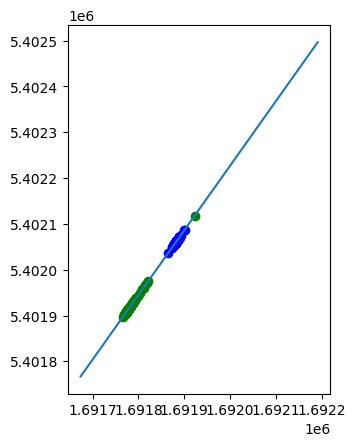

In [7]:
ax = transect.plot()
df.veg.plot(ax=ax, color="green", label="Vegetation edge")
df.water.plot(ax=ax, color="blue", label="Water edge")

In [8]:
m = transect.explore(tiles="Esri.WorldImagery")
df.veg.explore(color="green", label="Vegetation edge", m=m)
df.water.explore(color="blue", label="Water edge", m=m)
m.save("check_results.html")
m